In [16]:
# Generate a general random graph
from graph_tool.generation import random_graph
from numpy.random import uniform
graph_er = random_graph(20,lambda: uniform(high=10),directed=False)
# Rewire the graph according to Erdős–Rényi
from graph_tool.generation import random_rewire
random_rewire(graph_er,model='erdos')
print(graph_er.edges)

<bound method Graph.edges of <Graph object, undirected, with 20 vertices and 40 edges, at 0x7f287b0d6920>>


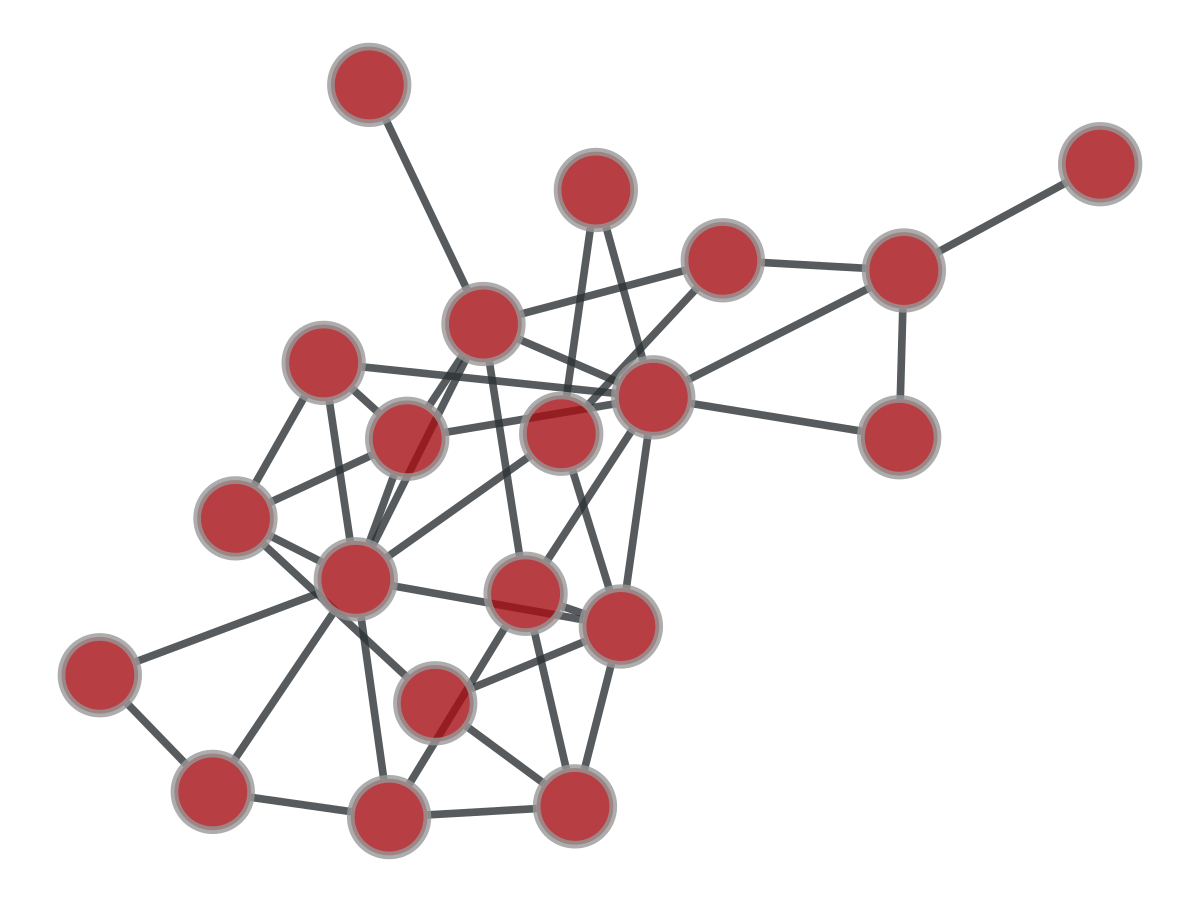

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f287b0d6920, at 0x7f287b0d6800>

In [17]:
from graph_tool.draw import graph_draw
graph_draw(graph_er)

In [18]:
# Generate a Barabási-Albert graph
from graph_tool.generation import price_network
graph_ba = price_network(20,directed=False)
print(graph_ba.edges)

<bound method Graph.edges of <Graph object, undirected, with 20 vertices and 19 edges, at 0x7f287b535f60>>


In [19]:
print(graph_ba.vertex_index)

<VertexPropertyMap object with value type 'unsigned long', for Graph 0x7f287b535f60, at 0x7f287b0d7610>


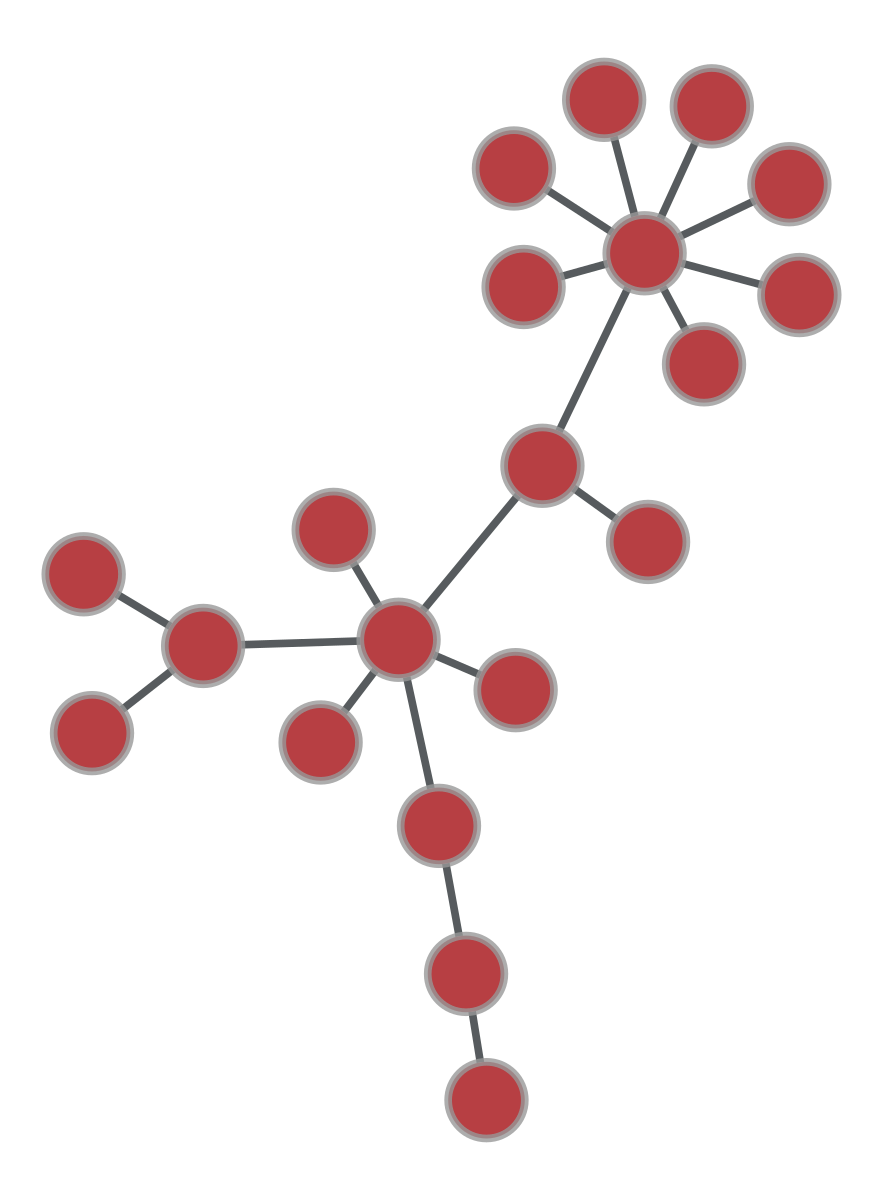

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f287b535f60, at 0x7f287b0d6860>

In [20]:
graph_draw(graph_ba)

In [21]:
# Calculate the pagerank for both graphs
from graph_tool.centrality import pagerank
pagerank_er = pagerank(graph_er)
pagerank_ba = pagerank(graph_ba)

In [22]:
import numpy as np

vtx_rank_er = np.argsort(np.argsort(pagerank_er.get_array()*(-1)))
vtx_rank_ba = np.argsort(np.argsort(pagerank_ba.get_array()*(-1)))

In [23]:
pr_er_text = graph_er.new_vertex_property("string")
idx = 0
for v in graph_er.vertices():
    pr_er_text[v] = str(vtx_rank_er[idx])
    idx += 1
pr_ba_text = graph_ba.new_vertex_property("string")
idx = 0
for v in graph_ba.vertices():
    pr_ba_text[v] = str(vtx_rank_ba[idx])
    idx += 1

Graph for Erdős–Rényi


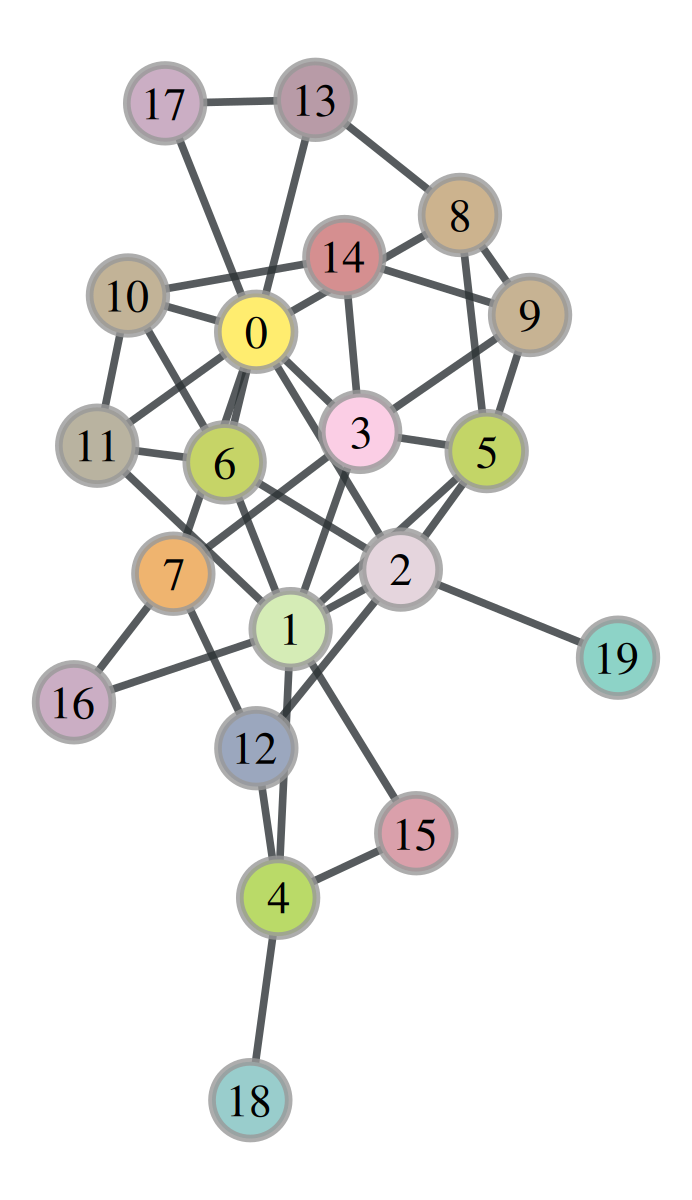

Graph for Barabási-Albert


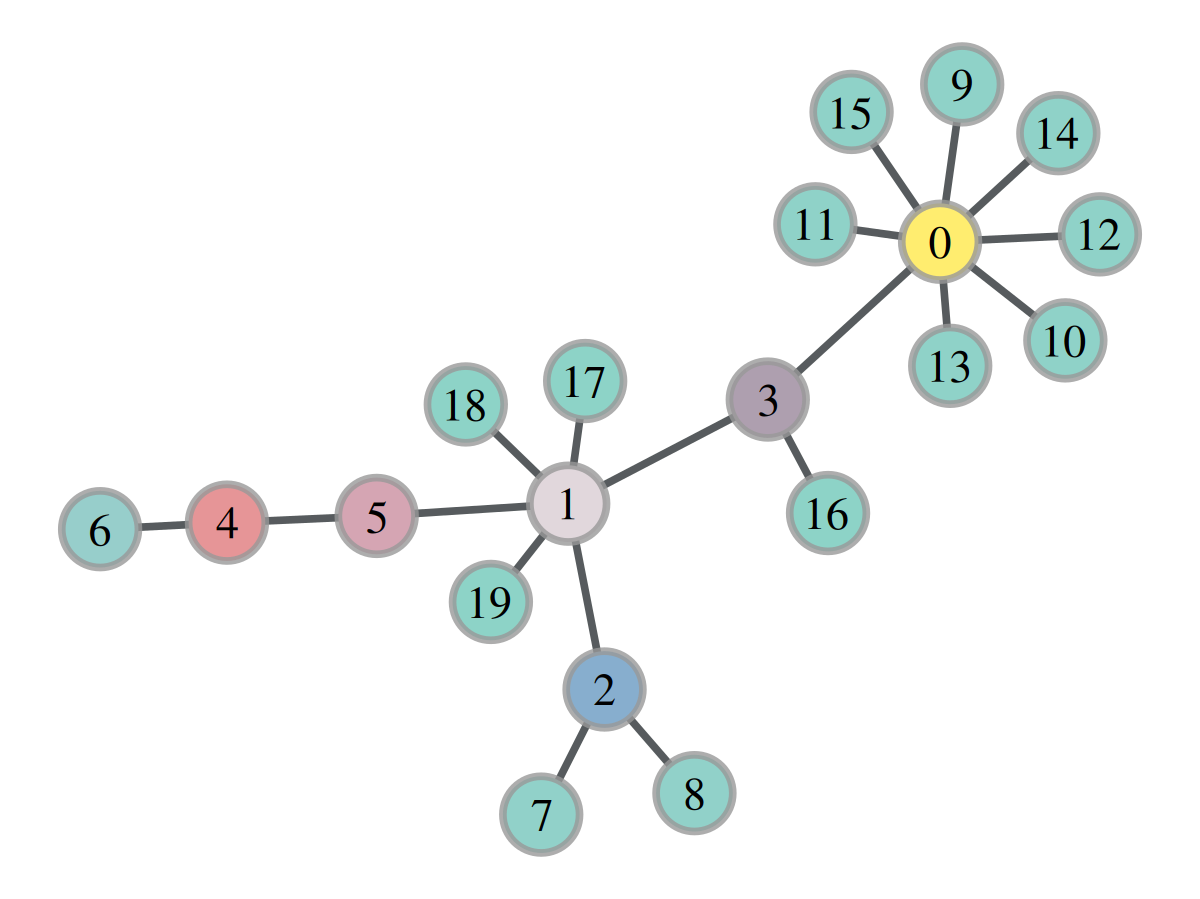

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f287b535f60, at 0x7f287afb07f0>

In [24]:
print("Graph for Erdős–Rényi")
graph_draw(graph_er,vertex_text=pr_er_text,vertex_fill_color=pagerank_er)
print("Graph for Barabási-Albert")
graph_draw(graph_ba,vertex_text=pr_ba_text,vertex_fill_color=pagerank_ba)

In [25]:
pr_er_values = pagerank_er.get_array()
pr_ba_values = pagerank_ba.get_array()

In [30]:
# Calculate the moments for both graphs
from scipy.stats import moment
print('Graph for Erdős–Rényi model:')
for i in range(1,6):
    print(f'Moment {i}: {moment(pr_er_values,moment=i)}')
print()
print('Graph for Barabási-Albert model:')
for i in range(1,6):
    print(f'Moment {i}: {moment(pr_ba_values,moment=i)}')

Graph for Erdős–Rényi model:
Moment 1: 0.0
Moment 2: 0.0004735538166165421
Moment 3: 8.065691428280943e-06
Moment 4: 7.156371534350018e-07
Moment 5: 2.5030745236944575e-08

Graph for Barabási-Albert model:
Moment 1: 0.0
Moment 2: 0.0019066211636276649
Moment 3: 0.00019572160947051157
Moment 4: 2.7652593003022682e-05
Moment 5: 3.848830783985198e-06
